In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
!mkdir data
trainset = datasets.MNIST('data', download=True, train=True, transform=transform)
valset = datasets.MNIST('data', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

A subdirectory or file data already exists.


# CNN classifier

In [19]:
def score(y_pred, y_true):
    winners = y_pred.argmax(dim=1)
    return (winners == y_true).sum() / winners.size(0)

In [17]:
class ConvModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.sequence = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(in_channels=10, out_channels=30, kernel_size=3),
            nn.MaxPool2d(kernel_size=3),
            nn.Flatten(),
            nn.Linear(120, 10),
            nn.Softmax()
        )
        
    def forward(self, x):
        return self.sequence(x)

EPOCH	 1


c:\Users\marcu\anaconda3\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Train Loss:	 1.677772911118546
Train Accuracy	 0.7986074
Val Loss:	 1.5978950102617786
Val Accuracy	 0.8674363
---------------------------
EPOCH	 2
Train Loss:	 1.5904416185198054
Train Accuracy	 0.8731177
Val Loss:	 1.584729552268982
Val Accuracy	 0.87778664
---------------------------
EPOCH	 3
Train Loss:	 1.51849830176022
Train Accuracy	 0.9461287
Val Loss:	 1.4891165783450862
Val Accuracy	 0.97442275
---------------------------
EPOCH	 4
Train Loss:	 1.4891374221742788
Train Accuracy	 0.97473013
Val Loss:	 1.4863386708460036
Val Accuracy	 0.97611463
---------------------------
EPOCH	 5
Train Loss:	 1.4849409433061889
Train Accuracy	 0.97831154
Val Loss:	 1.4818294936684286
Val Accuracy	 0.98158836
---------------------------
EPOCH	 6
Train Loss:	 1.4826008908784212
Train Accuracy	 0.98064363
Val Loss:	 1.4797409453969093
Val Accuracy	 0.9830812
---------------------------
EPOCH	 7
Train Loss:	 1.4802295124607046
Train Accuracy	 0.98227614
Val Loss:	 1.4796355590698824
Val Accuracy	 

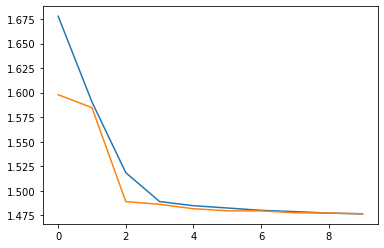

In [20]:
model = ConvModel()

n_epochs = 10
learning_rate = 1e-3
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []
train_acc = []
val_acc = []
for epoch in range(1, n_epochs + 1):
    print('EPOCH\t', epoch)
    batch_train_losses = []
    batch_val_losses = []
    batch_train_acc = []
    batch_val_acc = []
    
    for x_batch, y_batch in trainloader:
        y_onehot = nn.functional.one_hot(y_batch, num_classes=10).float()
        
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_onehot)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_train_losses.append(loss.item())
        batch_train_acc.append(score(y_pred, y_batch))
        
    train_losses.append(np.mean(batch_train_losses))
    train_acc.append(np.mean(batch_train_acc))
    
    print('Train Loss:\t', train_losses[-1])
    print('Train Accuracy\t', train_acc[-1])
        
    with torch.no_grad():
        for x_batch, y_batch in valloader:
            y_onehot = nn.functional.one_hot(y_batch, num_classes=10).float()
        
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_onehot)
            
            batch_val_losses.append(loss.item())
            batch_val_acc.append(score(y_pred, y_batch))
        
        val_losses.append(np.mean(batch_val_losses))
        val_acc.append(np.mean(batch_val_acc))
        
    print('Val Loss:\t', val_losses[-1])
    print('Val Accuracy\t', val_acc[-1])
    print('---------------------------')

fig, ax = plt.subplots()
ax.plot(np.arange(epoch), train_losses)
ax.plot(np.arange(epoch), val_losses)
plt.show()

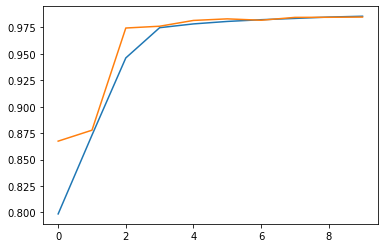

In [23]:
fig, ax = plt.subplots()
ax.plot(np.arange(epoch), train_acc)
ax.plot(np.arange(epoch), val_acc)
plt.show()